In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from google.colab import drive
from scipy import stats
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/ADS2001 project/virtualInternshipData_ADS2001.csv', encoding = 'ISO-8859-1')

Mounted at /content/drive/


<ipython-input-4-40babcc58740>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'group_id', y = 'sentiment_score', data = data, inner = "point", palette='viridis')


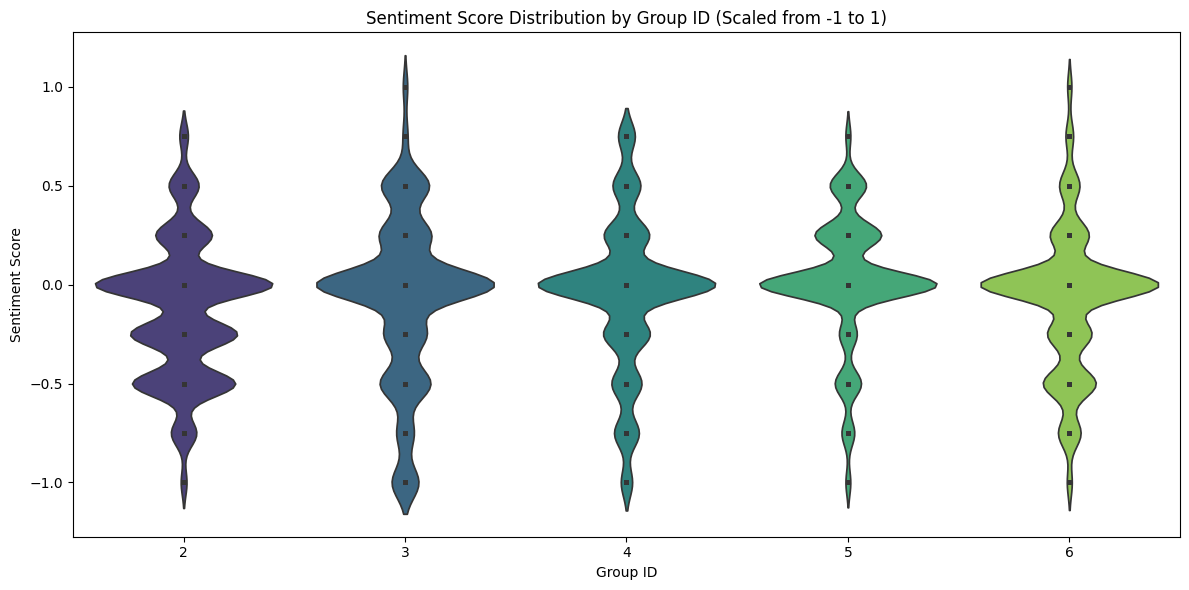

<ipython-input-4-40babcc58740>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='group_id', y ='sentiment_score', data = avg_sentiment_score, palette='viridis')


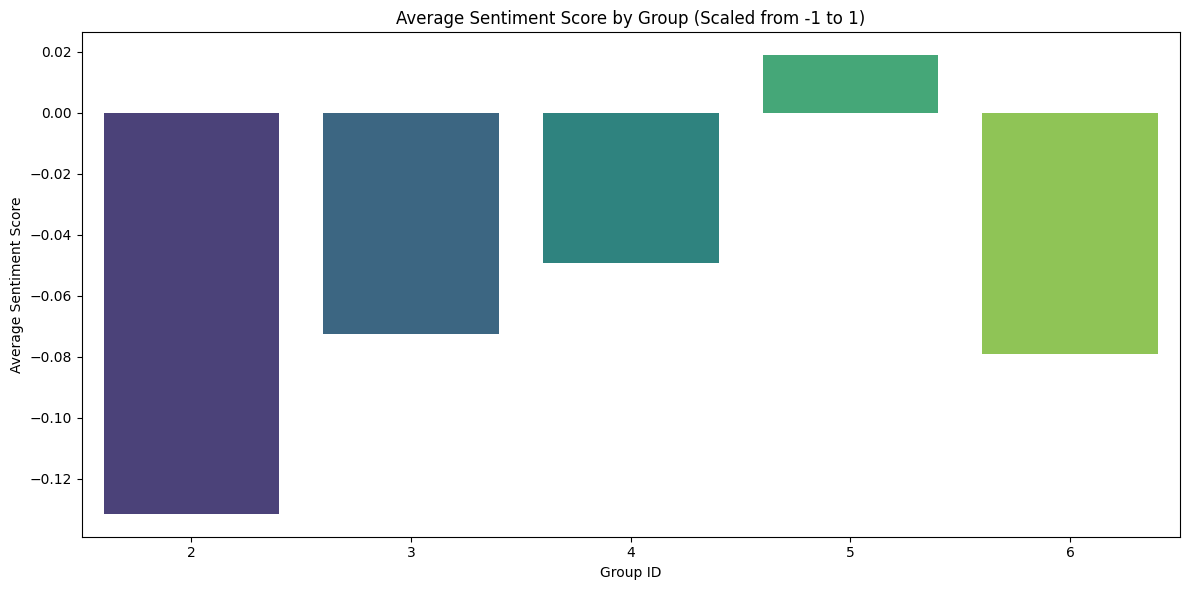

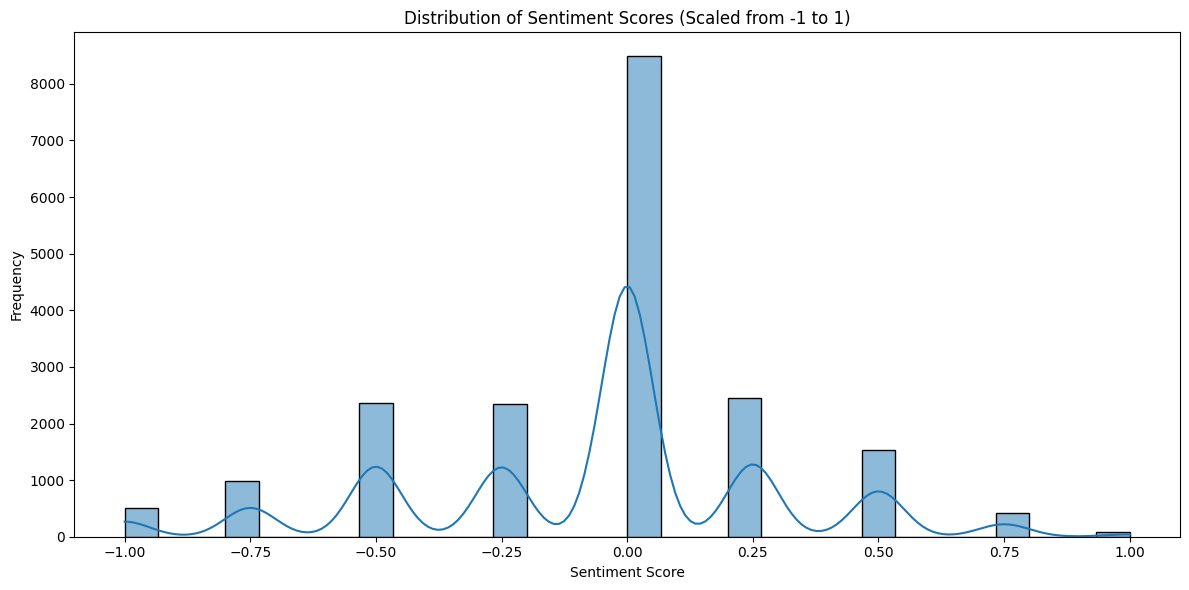

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = df

# normalize the outcome score to range from -1 to 1
min_score = data['OutcomeScore'].min()
max_score = data['OutcomeScore'].max()

# apply the min and max score scaling to the outcome score
data['sentiment_score'] = 2 * ((data['OutcomeScore'] - min_score) / (max_score - min_score)) - 1

# plot violin plot to show the sentiment score distribution by each group
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'group_id', y = 'sentiment_score', data = data, inner = "point", palette='viridis')
plt.title('Sentiment Score Distribution by Group ID (Scaled from -1 to 1)')
plt.xlabel('Group ID')
plt.ylabel('Sentiment Score')
plt.tight_layout()
plt.show()

# calculate the average sentiment score for each group
avg_sentiment_score = data.groupby('group_id')['sentiment_score'].mean().reset_index()

# plot bar plot to show the sentiment score distribution by each group
plt.figure(figsize = (12, 6))
sns.barplot(x ='group_id', y ='sentiment_score', data = avg_sentiment_score, palette='viridis')
plt.title('Average Sentiment Score by Group (Scaled from -1 to 1)')
plt.xlabel('Group ID')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()

# plot the distribution of the sentiment scores (regardless of group) scaled from -1 to 1
plt.figure(figsize=(12, 6))
sns.histplot(data['sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores (Scaled from -1 to 1)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
